In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
from pathlib import Path

import cv2 as cv
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [3]:
matplotlib.rcParams['figure.figsize'] = (12,12)

In [4]:
# configuration
bs2bk_ratio = 0.5

In [5]:
#function area


In [6]:
base_path = Path('../data/')
base_impath = str(base_path.joinpath('idcard/base2.png'))
back_impath = str(base_path.joinpath('background/img1.jpg'))

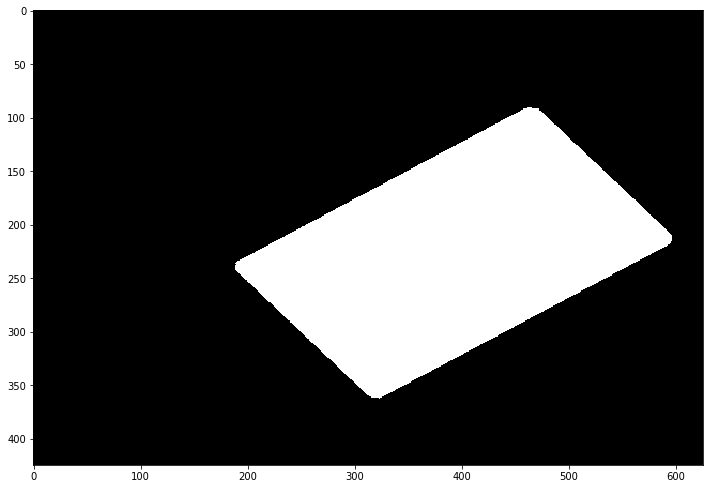

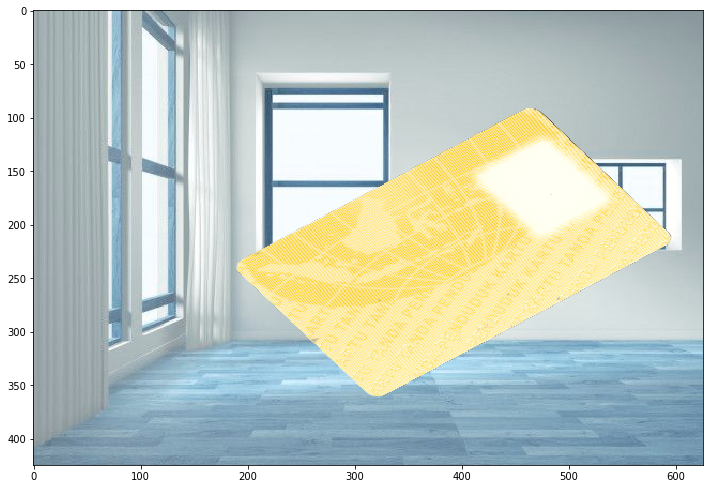

[[185 238]
 [467  88]
 [601 214]
 [318 365]]
(1, 4, 2)


In [7]:
from idcard_datagen.utils import transform
from idcard_datagen.utils import functions as F
import imutils


base_image = cv.imread(base_impath, cv.IMREAD_UNCHANGED)
back_image = cv.imread(back_impath, cv.IMREAD_COLOR)

segmentation = transform.AugmentGenerator(scale_ratio=0.7)
seg_img, cmp_img, boxes = segmentation(back_image, base_image)

data = {
    'original_image': '',
    'segmented_image': '',
    'objects':[
        {
            'name':'idcard',
            'coordinate': '',
            'rotation_angle': '',
            'shear_factor': ''
         },
    ]
}

# polyline_boxes = boxes.reshape((-1, 1, 2)).astype(np.int32)
# cmp_img = cv.polylines(cmp_img, [polyline_boxes], True, (0, 0, 255), 2)


plt.imshow(seg_img, cmap='gray');plt.show()
plt.imshow(cmp_img, cmap='gray');plt.show()
# plt.imshow(result, cmap='gray');plt.show()
print(boxes[0])
print(boxes.shape)

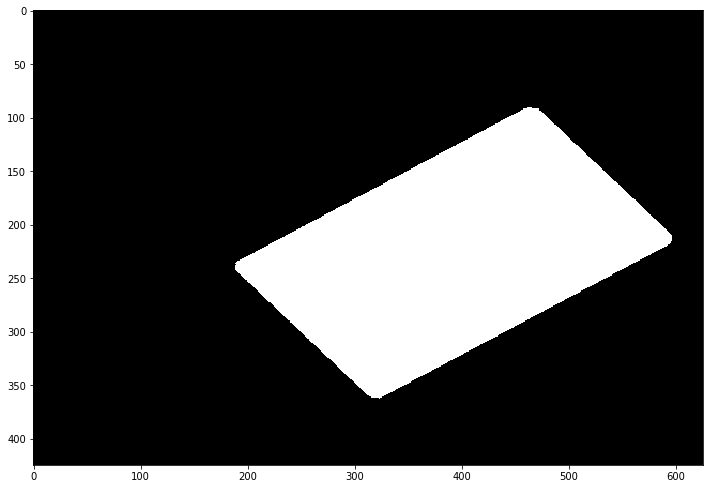

In [8]:
plt.imshow((seg_img*255).astype(np.uint8),cmap='gray')

[[185. 238.]
 [601. 214.]
 [601. 214.]
 [185. 238.]]


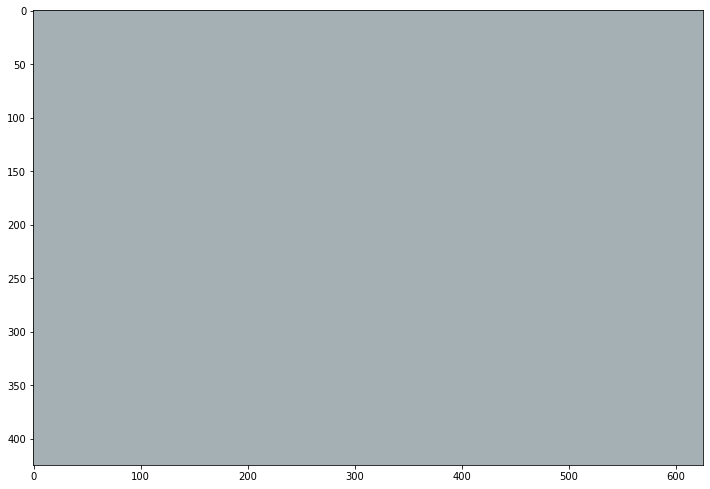

In [9]:
points = F.order_points(boxes[0])
print(points)
warped = F.four_point_transform(cmp_img.copy(), points)
plt.imshow(warped, cmap='gray');plt.show()

In [69]:
seg_img.dtype

dtype('float64')

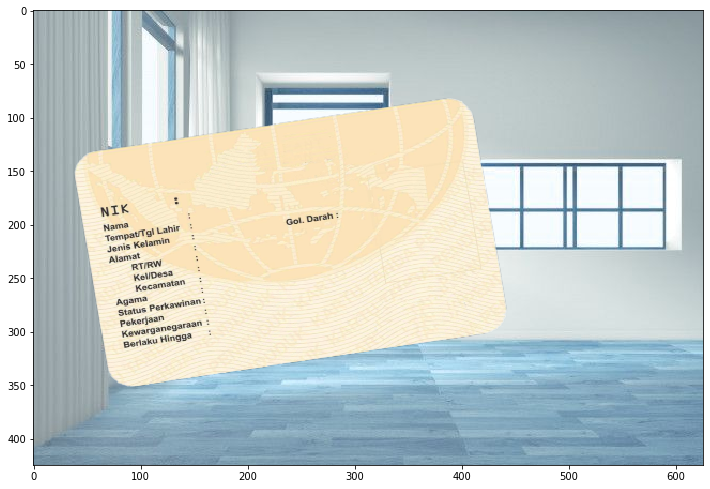

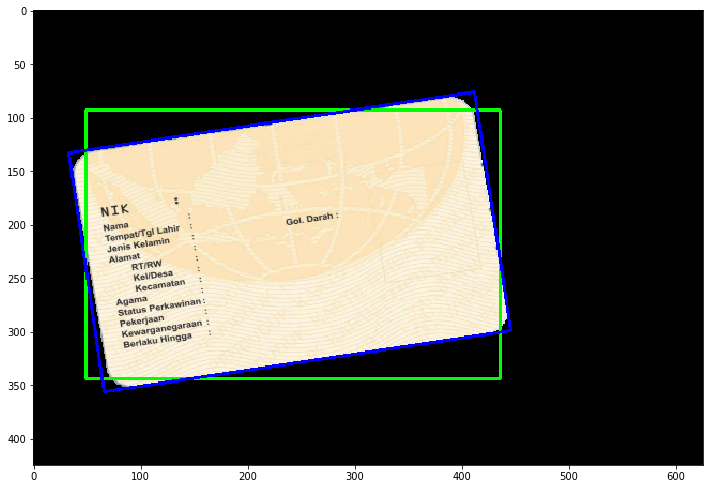

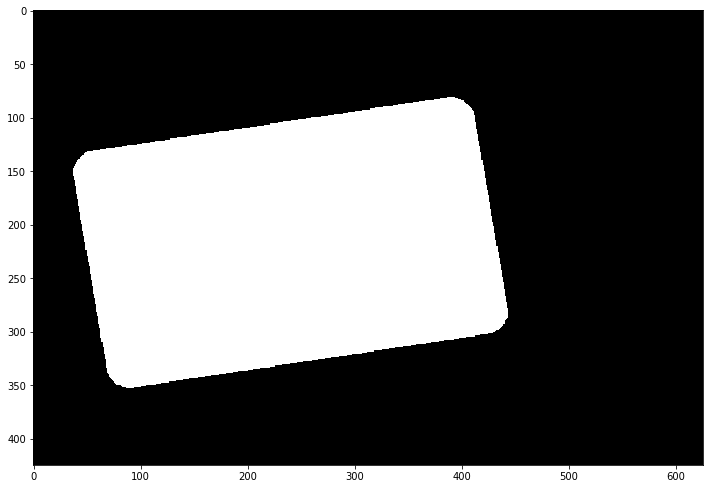

In [70]:
# base_segment = utils.image_selection(base_image, val=0)
# xmin,ymin,xmax,ymax = box  = F.to_xyminmax_box(boxes[0])
# rect = cv.boundingRect(boxes)
# x,y,w,h = rect
# print(box)
# croped = cmp_img[y:y+h, x:x+w].copy()

mask = seg_img.astype(np.uint8)
dst = cv.bitwise_and(cmp_img, cmp_img, mask=mask)
# print(dst.shape, dst.dtype)

edge = imutils.auto_canny(mask)
# points = cv.findNonZero(gray)

# contours,_ = cv.findContours(edge, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
#
# for contour in contours:
#     (x,y,w,h) = cv.boundingRect(contour)
#     dst  = cv.rectangle(dst, (x,y), (x+w,y+h), (0,255,0), 4)
#
cnts = cv.findContours(edge.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
cnts = imutils.grab_contours(cnts)
cnts = sorted(cnts, key = cv.minAreaRect, reverse = True)[:10]
#

# loop over our contours
screenCnt = None
for c in cnts:
    # approximate the contour
    peri = cv.arcLength(c, True)
    approx = cv.approxPolyDP(c, 0.02 * peri, True)
    # if len(approx) == 4:
    #     screenCnt = approx
    #     ((x,y),(w,h),angle) = cv.minAreaRect(c)
    #     rows,cols = mask.shape[:2]
    #     M = cv.getRotationMatrix2D((int(cols/2),int(rows/2)), angle, 1.0)
    #     nmask = cv.warpAffine(mask, M,(cols,rows))
    #     break
    if len(approx) == 4:
        # (x,y), (w,h), angle = cv.minAreaRect(c)
        # rows, cols = mask.shape[:2]
        # M = cv.getRotationMatrix2D((int(cols/2),int(rows/2)), angle, 1.0)
        # nmask = cv.warpAffine(mask, M,(cols,rows))
        screenCnt = approx
        x,y,w,h = cv.boundingRect(screenCnt)
        cv.rectangle(dst,(x,y),(x+w,y+h),(0,255,0),2)# <-- Get rectangle here
        # cv.rectangle(dst,(x,y),(x+w,y+h),(0,255,0),2)
        rect = cv.minAreaRect(c)
        box = cv.boxPoints(rect)
        box = np.int0(box)
        cv.drawContours(dst,[box],0,(0,0,255),2)
        # break


# print(screenCnt)
# cv.drawContours(dst, [screenCnt], -1, (0, 255, 0), 3)


## (4) add the white background
# bg = np.ones_like(cmp_img, np.uint8)*255
# cv.bitwise_not(bg,bg, mask=mask)
# dst2 = bg+ dst

plt.imshow(cmp_img, cmap='gray');plt.show()
plt.imshow(dst, cmap='gray');plt.show()
plt.imshow(mask, cmap='gray'); plt.show()
# plt.imshow(nmask, cmap='gray'); plt.show()

# plt.imshow(dst2, cmap='gray');plt.show()

In [71]:
# base_img_size = base_image.shape[:2]
# back_img_size = back_image.shape[:2]
# bsn_h,bsn_w = bsn_size = utils.scale_size_ratio(back_img_size, base_img_size,  ratio=0.25)
# bsn_dsize = (bsn_w, bsn_h)
#
# box_xy = utils.random_safe_box_location(back_img_size, bsn_size)
# xmin, ymin, xmax, ymax = box_xy
#
# segment_image = utils.create_segmentation_image(base_segment, back_img_size, bsn_dsize, box_xy)
# overlay_image = utils.create_overlay_image(base_image, back_img_size, bsn_dsize, box_xy)
# result = utils.composite2image(back_image, overlay_image)
#
# plt.imshow(segment_image, cmap='gray');plt.show()
# plt.imshow(overlay_image, cmap='gray');plt.show()
# plt.imshow(result, cmap='gray');plt.show()
# print(box_xy)

In [72]:
# base_selection_resized = cv.resize(base_selection.copy(), dsize=bsn_dsize)
# base_image_segment = np.zeros(back_img_size)
# base_image_segment[ymin:ymax, xmin:xmax] = base_selection_resized
# segment_image = join2image(base_selection, back_img_size, bsn_size, box_xy)
#
#
# base_image_resized = cv.resize(base_image.copy(), dsize=bsn_dsize)
# base_image_overlay = np.zeros((back_img_size[0],back_img_size[1],4), np.uint8)
# base_image_overlay[ymin:ymax, xmin:xmax] = base_image_resized
#
# segment_image = join2image(base_selection, back_img_size, bsn_size, box_xy)
#
#
# result = utils.composite2image(back_image, base_image_overlay)


In [75]:
from pathlib import Path
list(Path('../data/background').glob("*.jpg"))

[]